# Milestone 2 - Hypothesis Simulation 

## Author - Tariq Ayub



## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods
3. Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [2]:
# Import libraries
import pandas as pd
#saving the file into pandas dataframe
auto = pd.read_csv(fileName)

In [3]:
auto.columns = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
#dropping column with several missing values
del auto['normalized-losses']

In [17]:
#replacing missing values with NaN
autodata = auto.replace(to_replace= '?', value = float("NaN"))

In [18]:
#evaluating NaN
autodata.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [19]:
#removing rows with NaN 
autodata = auto.dropna(axis=0)

In [20]:
autodata.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [21]:
#reinding after dropping na
autodata.reset_index()

,index,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,3,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,4,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,5,2,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,6,1,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,7,1,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,10,2,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


In [22]:
#converting data type to int
autodata.loc[:, "price"] = autodata.loc[:, "price"].astype(int)

C:\Users\T\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
#converting data type to int
autodata.loc[:, "horsepower"] = autodata.loc[:, "horsepower"].astype(int)

In [24]:
#converting data type to int
autodata.loc[:, "peak-rpm"] = autodata.loc[:, "peak-rpm"].astype(int)

In [25]:
import pandas
import numpy
from matplotlib import pyplot
import seaborn
import statsmodels.api as sm
import scipy

%matplotlib inline

In [26]:
#price data 
price = autodata.loc[:,'price']

In [27]:
horsepower = autodata.loc[:,'horsepower']
curbweight = autodata.loc[:,'curb-weight']
peakrpm = autodata.loc[:,'peak-rpm']

In [28]:
#converting dataframe to array
price = numpy.array(price)

In [29]:
#converting dataframe to array
horsepower = numpy.array(horsepower)
curbweight = numpy.array(curbweight)
peakrpm = numpy.array(peakrpm)

In [30]:
type(price)

numpy.ndarray

C:\Users\T\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


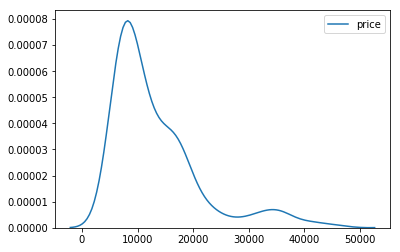

In [31]:
seaborn.kdeplot(price, label="price")

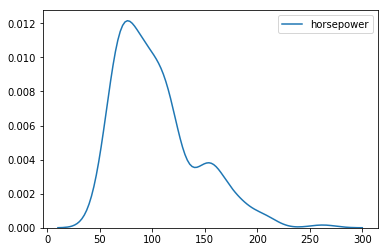

In [32]:
seaborn.kdeplot(horsepower, label="horsepower")

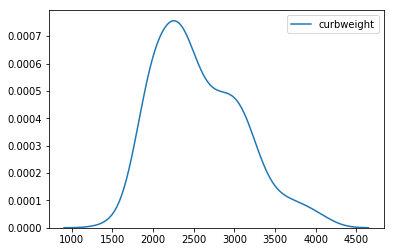

In [33]:

seaborn.kdeplot(curbweight, label="curbweight")


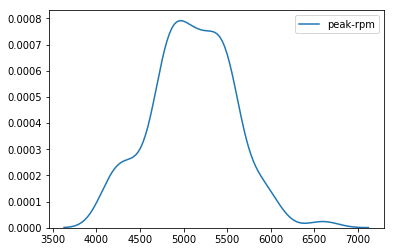

In [34]:
seaborn.kdeplot(peakrpm, label="peak-rpm")

In [35]:
#sampling using Classical method

Text(0, 0.5, 'Price')

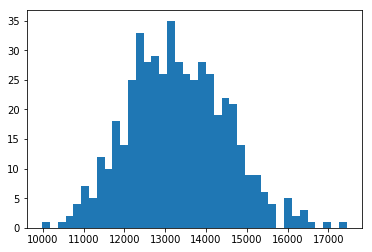

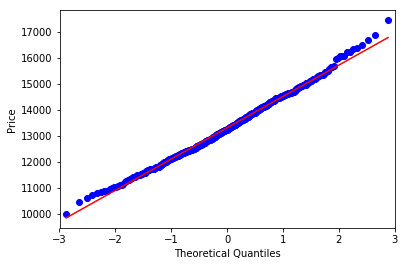

In [425]:
x_means = numpy.array([
        numpy.random.choice(price, size=50, replace=True).mean()
        for i in range(500)])

breaks = numpy.linspace(x_means.min(), x_means.max(), num=40)
_ = pyplot.hist(x_means, bins=breaks)
_ = sm.qqplot(x_means, line='s')
pyplot.ylabel('Price')

In [426]:
pop_mean = x_means.mean()
pop_std = x_means.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, x.mean()))
print('Estimated s.d. (%.3f) vs actual s.d. (%.3f)' % (pop_std, x.std()))

Estimated mean (13309.923) vs actual mean (0.500)
Estimated s.d. (1205.415) vs actual s.d. (0.291)


In [427]:
alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

print('The actual mean is %.2f' % x.mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 2362.57
The actual mean is 0.50
The 0.95 level CI is (10947.35 , 15672.49)


Text(0, 0.5, 'horsepower')

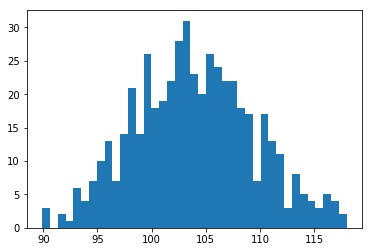

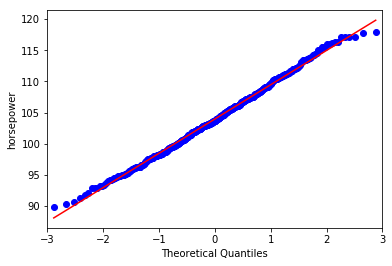

In [428]:
#sampling for horsepower
x_means = numpy.array([
        numpy.random.choice(horsepower, size=50, replace=True).mean()
        for i in range(500)])

breaks = numpy.linspace(x_means.min(), x_means.max(), num=40)
_ = pyplot.hist(x_means, bins=breaks)
_ = sm.qqplot(x_means, line='s')
pyplot.ylabel('horsepower')

In [429]:
#Estimated vs actual for horsepower
pop_mean = x_means.mean()
pop_std = x_means.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, x.mean()))
print('Estimated s.d. (%.3f) vs actual s.d. (%.3f)' % (pop_std, x.std()))

Estimated mean (103.949) vs actual mean (0.500)
Estimated s.d. (5.511) vs actual s.d. (0.291)


In [430]:
#values within 2 sigma confidence interval for horsepower
alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

print('The actual mean is %.2f' % x.mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 10.80
The actual mean is 0.50
The 0.95 level CI is (93.15 , 114.75)


Text(0, 0.5, 'peakrpm')

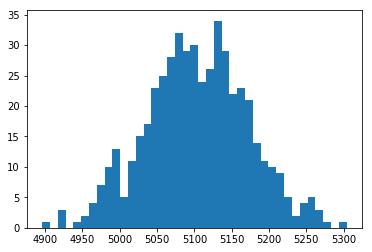

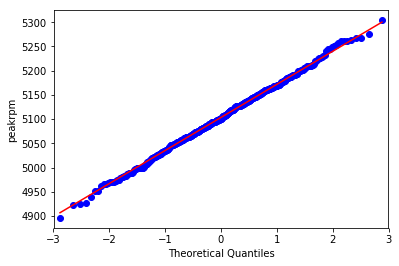

In [431]:
#sampling for peakrpm 
x_means = numpy.array([
        numpy.random.choice(peakrpm, size=50, replace=True).mean()
        for i in range(500)])

breaks = numpy.linspace(x_means.min(), x_means.max(), num=40)
_ = pyplot.hist(x_means, bins=breaks)
_ = sm.qqplot(x_means, line='s')
pyplot.ylabel('peakrpm')

In [432]:
#estimated vs actual for peakrpm
pop_mean = x_means.mean()
pop_std = x_means.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, x.mean()))
print('Estimated s.d. (%.3f) vs actual s.d. (%.3f)' % (pop_std, x.std()))

Estimated mean (5103.414) vs actual mean (0.500)
Estimated s.d. (68.322) vs actual s.d. (0.291)


In [433]:
#values within 2 sigma confidence interval for peakrpm
alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

print('The actual mean is %.2f' % x.mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 133.91
The actual mean is 0.50
The 0.95 level CI is (4969.51 , 5237.32)


In [434]:
#Bootstrap method 

import pandas
import numpy
from matplotlib import pyplot
import seaborn

%matplotlib inline

In [435]:
auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [436]:
autodata.loc[:,'curb-weight'].unique()

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 2395, 2710, 2765,
       3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967, 1989,
       2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024, 2236, 2289,
       2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900, 1905, 1945,
       1950, 2385, 2410, 2425, 2670, 2700, 3515, 3750, 3495, 3770, 3740,
       3685, 3900, 3715, 2910, 1918, 1944, 2004, 2145, 2370, 2328, 2833,
       2921, 2926, 2365, 2405, 2403, 1889, 2017, 1938, 1951, 2028, 1971,
       2037, 2008, 2324, 2302, 3095, 3296, 3060, 3071, 3139, 3020, 3197,
       3430, 3075, 3252, 3285, 3485, 3130, 2191, 2818, 2778, 2756, 2800,
       2658, 2695, 2707, 2758, 2808, 2847, 2050, 2120, 2240, 2190, 2340,
       2510, 2290, 2455, 2420, 2650, 1985, 2040, 2015, 2280, 3110, 2081,
       2109, 2275, 2094, 2122, 2140, 2169, 2204, 2265, 2300, 2540, 2536,
       2551, 2679, 2714, 2975, 2326, 2480, 2414, 2458, 2976, 3016, 3131,
       3151, 2261, 2209, 2264, 2212, 2319, 2254, 22

In [437]:
# seperating data for curb-weight. Spliting from the mean
below2555 = autodata[autodata['curb-weight'] <= 2555]
above2555 = autodata[autodata['curb-weight'] > 2555]


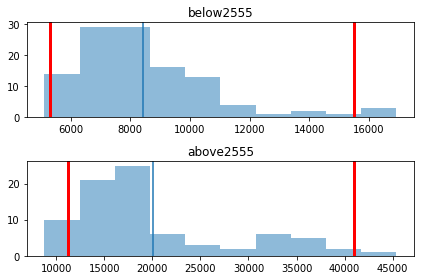

In [438]:
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    pyplot.hist(x, alpha=.5)
    pyplot.axvline(x.mean())
    # 95% confidence interval    
    pyplot.axvline(numpy.percentile(x, p/2.), color='red', linewidth=3)
    pyplot.axvline(numpy.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pandas.concat([a, b])
    breaks = numpy.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    pyplot.subplot(2, 1, 1)
    plot_hist(a)
    pyplot.title(a_label)
    
    pyplot.subplot(2, 1, 2)
    plot_hist(b)
    pyplot.title(b_label)
    
    pyplot.tight_layout()
    

plot_dists(below2555.price, above2555.price, 20, a_label='below2555', b_label='above2555')

In [439]:
#the prices of below2555 curb-weight and above2555 curb-weight is very different

In [440]:
#using pandas built in bootstrap samples
below2555.sample(frac=1, replace=True).head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
78,2,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,...,92,2bbl,2.97,3.23,9.40,68,5500,31,38,6669
187,2,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,171.7,...,97,idi,3.01,3.40,23.00,68,4500,37,42,9495
21,1,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572
148,0,subaru,gas,std,four,wagon,4wd,front,96.9,173.6,...,108,2bbl,3.62,2.64,9.00,82,4800,23,29,8013
76,2,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,...,92,2bbl,2.97,3.23,9.40,68,5500,37,41,5389


In [441]:
#taking mean of the bootstrap sample
below2555.sample(frac=1, replace=True).price.mean()

8524.6875

In [442]:
above2555.sample(frac=1, replace=True).head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
70,-1,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
181,-1,toyota,gas,std,four,wagon,rwd,front,104.5,187.8,...,161,mpfi,3.27,3.35,9.2,156,5200,19,24,15750
47,0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250
133,2,saab,gas,std,four,sedan,fwd,front,99.1,186.6,...,121,mpfi,3.54,3.07,9.3,110,5250,21,28,12170
196,-2,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [443]:
above2555.sample(frac=1, replace=True).price.mean()

22210.074074074073

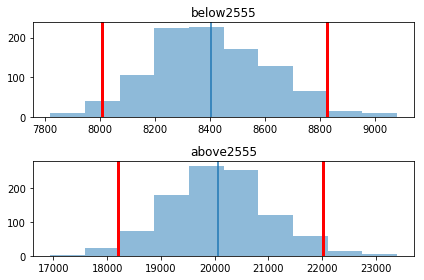

In [444]:
n_replicas = 1000

below2555_bootstrap_means = pandas.Series([
    below2555.sample(frac=1, replace=True).price.mean()
    for i in range(n_replicas)])

above2555_bootstrap_means = pandas.Series([
        above2555.sample(frac=1, replace=True).price.mean()
        for i in range(n_replicas)])

plot_dists(below2555_bootstrap_means, above2555_bootstrap_means, 
           nbins=80, a_label='below2555', b_label='above2555')

In [445]:
#the distribution of the boorstap mean do not overlap. Cars with heavier curb weight are priced 
#a lot more higher

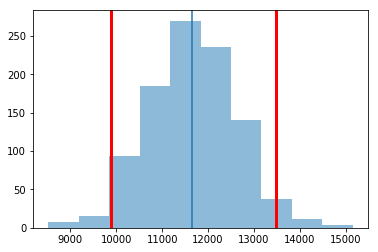

In [446]:
diffs = []
for i in range(n_replicas):
    sample = autodata.sample(frac=1.0, replace=True)
    below2555_sample_mean = sample[sample['curb-weight'] <= 2555].price.mean()
    above2555_sample_mean = sample[sample['curb-weight'] > 2555].price.mean()
    diffs.append(above2555_sample_mean - below2555_sample_mean)
diffs = pandas.Series(diffs)

plot_hist(diffs)

In [447]:
#binning value for curb weight  for bayes model

In [448]:
autodata['curb-weight'] = numpy.where(autodata['curb-weight'].between(0,2555), 0, autodata['curb-weight'])

C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [449]:
autodata['curb-weight'] = numpy.where(autodata['curb-weight'].between(2556,5000), 1, autodata['curb-weight'])

C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [450]:
cw = autodata.loc[:, 'curb-weight']

In [451]:
#converting dataframe to array
cw = numpy.array(cw)

In [452]:
numpy.unique(cw, return_counts=True)

(array([0, 1], dtype=int64), array([112,  81], dtype=int64))

In [453]:
N = len(cw)  # sample size
n_cw = sum(cw)  # number 4 door
n_not = N - n_cw # number 2 door
print('above2555 = %d below2555 = %d'
    '\nProbability of above2555 = %.1f' 
      % (n_cw, n_not, n_cw / (n_cw + n_not)))

above2555 = 81 below2555 = 112
Probability of above2555 = 0.4


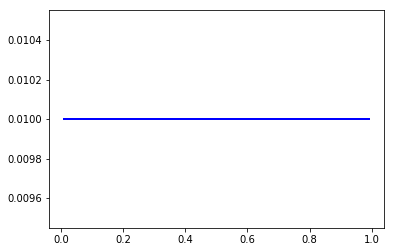

In [454]:
N = 100
p = numpy.linspace(.01, .99, num=N)
pp = [1./N] * N
pyplot.plot(p, pp, linewidth=2, color='blue')

Text(0, 0.5, 'Likelihood')

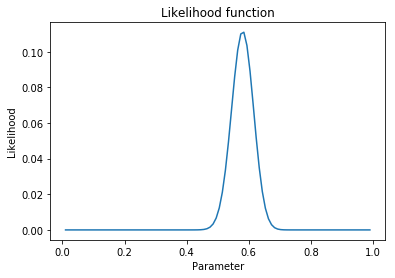

In [455]:
def likelihood(p, data):
    k = sum(data)
    N = len(data)
    # Compute Binomial likelihood
    l = scipy.special.comb(N, k) * p**k * (1-p)**(N-k)
    # Normalize the likelihood to sum to unity
    return l/sum(l)

l = likelihood(p, doortypes)
pyplot.plot(p, l)
pyplot.title('Likelihood function')
pyplot.xlabel('Parameter')
pyplot.ylabel('Likelihood')

In [456]:
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

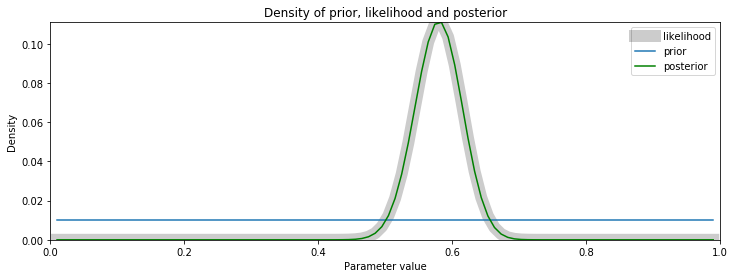

In [457]:
def plot_post(prior, like, post, x):
    maxy = max(max(prior), max(like), max(post))
    pyplot.figure(figsize=(12, 4))
    pyplot.plot(x, like, label='likelihood', linewidth=12, color='black', alpha=.2)
    pyplot.plot(x, prior, label='prior')
    pyplot.plot(x, post, label='posterior', color='green')
    pyplot.ylim(0, maxy)
    pyplot.xlim(0, 1)
    pyplot.title('Density of prior, likelihood and posterior')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.legend()
    
post = posterior(pp, l)
plot_post(pp, l, post, p)

In [458]:
print('Maximum of the prior density = %.3f' % max(pp))
print('Maximum likelihood = %.3f' % max(l))
print('MAP = %.3f' % max(post))

Maximum of the prior density = 0.010
Maximum likelihood = 0.111
MAP = 0.111


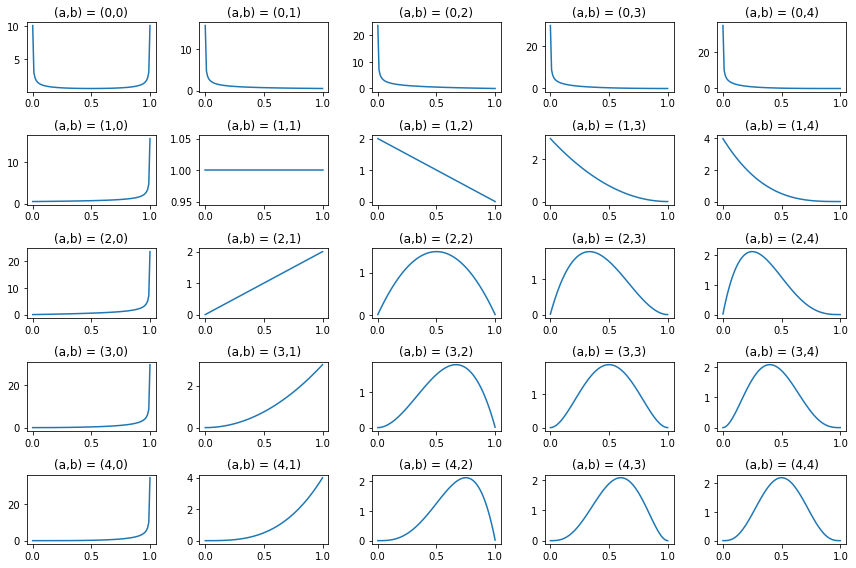

In [459]:
import itertools

pyplot.figure(figsize=(12, 8))

alpha = [.5, 1, 2, 3, 4]
beta = alpha[:]
x = numpy.linspace(.001, .999, num=100)

for i, (a, b) in enumerate(itertools.product(alpha, beta)):
    pyplot.subplot(len(alpha), len(beta), i+1)
    pyplot.plot(x, scipy.stats.beta.pdf(x, a, b))
    pyplot.title('(a,b) = (%d,%d)' % (a,b))
pyplot.tight_layout() 

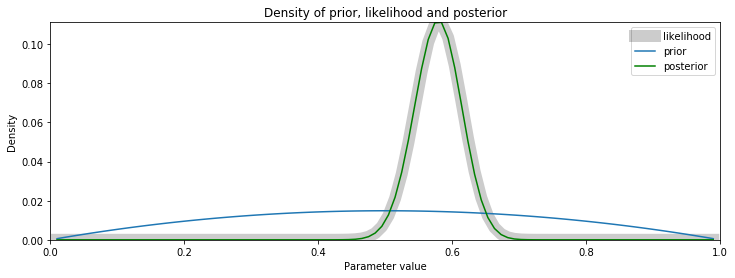

In [460]:
def beta_prior(x, a, b):
    l = scipy.stats.beta.pdf(p, a, b)  # compute likelihood
    return l / l.sum()  # normalize and return

pp = beta_prior(p, 2, 2)
post = posterior(pp, l)
plot_post(pp, l, post, p)

In [ ]:
#we found a great insight into the data. After binning and apply bayes model to curb weights
#we found  that compared to milestone 5 assignment the probability and distribution for number of 
#doors and curb weight is highly correlated. there are approximately the same number of car with 4 
#door and a high curb weight and vice versa. 